#### 코드 참조 
[1] https://github.com/rickiepark/machine-learning-with-python-cookbook
[2] https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html 
[3] https://github.com/mikexcohen/LinAlgBook/blob/main/python
[4] https://docs.sympy.org/latest/tutorial/matrices.html
[5] Dr. Jaewook Lee's Lecture Notes

## 3장 최소 좌승법과 QR 분해

## 3.1 그람슈미트 직교화(GS orthogonalization)

In [1]:
## import libraries for the entire chapter
import numpy as np
# create the matrix 
m = 4
n = 4
A = np.random.randn(m,n)

# initialize
Q = np.zeros((m,n))

In [2]:
# the GS algo
for i in range(n):
    
    # initialize
    Q[:,i] = A[:,i]
    
    # orthogonalize
    a = A[:,i] # convenience
    for j in range(i): # only to earlier cols
        q = Q[:,j] # convenience
        Q[:,i]=Q[:,i]-np.dot(a,q)*q
    
    # normalize
    Q[:,i] = Q[:,i] / np.linalg.norm(Q[:,i])

In [3]:
Q

array([[ 0.17168477, -0.1951414 , -0.93178063,  0.25343448],
       [-0.60214117, -0.52752415, -0.15772184, -0.57815924],
       [ 0.15804182,  0.65291337, -0.29270199, -0.68047958],
       [-0.76352677,  0.50728911, -0.1457197 ,  0.37208924]])

In [4]:
# "real" QR decomposition for comparison
Q2,R = np.linalg.qr(A)


# note the possible sign differences.
# seemingly non-zero columns will be 0 when adding
Q-Q2

array([[ 3.43369547e-01, -1.38777878e-16, -1.11022302e-16,
        -2.77555756e-16],
       [-1.20428234e+00, -1.11022302e-16, -4.16333634e-16,
        -5.55111512e-16],
       [ 3.16083632e-01,  0.00000000e+00,  5.55111512e-17,
         0.00000000e+00],
       [-1.52705355e+00,  0.00000000e+00, -3.05311332e-16,
        -2.77555756e-16]])

In [5]:
R

array([[-2.03221325,  1.44593907,  1.45711579,  0.32115038],
       [ 0.        ,  2.69909531,  0.12448096,  0.92138749],
       [ 0.        ,  0.        ,  0.63950558, -1.18683536],
       [ 0.        ,  0.        ,  0.        ,  1.31126058]])

In [6]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

In [7]:
c1, c2 = 5.0, 2.0
i = np.r_[1:11]
i

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [8]:
xi = 0.1*i
yi = c1*np.exp(-xi) + c2*xi
zi = yi + 0.05 * np.max(yi) * np.random.randn(len(yi))
A = np.c_[np.exp(-xi)[:, np.newaxis], xi[:, np.newaxis]]
c, resid, rank, sigma = linalg.lstsq(A, zi)

In [9]:
linalg.lstsq?

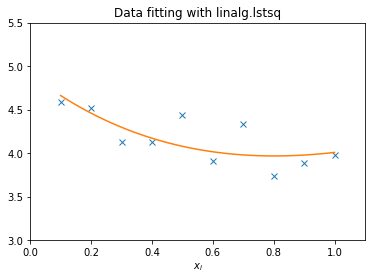

In [10]:
xi2 = np.r_[0.1:1.0:100j]
yi2 = c[0]*np.exp(-xi2) + c[1]*xi2
plt.plot(xi,zi,'x',xi2,yi2)
plt.axis([0,1.1,3.0,5.5])
plt.xlabel('$x_i$')
plt.title('Data fitting with linalg.lstsq')
plt.show()

In [11]:
q, r = linalg.qr(A)
np.allclose(A, np.dot(q, r))

True

In [12]:
A.shape, q.shape, r.shape

((10, 2), (10, 10), (10, 2))

In [13]:
# either both Q and R (‘full’, default), only R (‘r’) or 
# both Q and R but computed in economy-size (‘economic’, see Notes)
r2 = linalg.qr(A, mode='r')
np.allclose(r, r2)

True

In [14]:
linalg.qr?

In [15]:
q3, r3 = linalg.qr(A, mode='economic')
q3.shape, r3.shape

((10, 2), (2, 2))

In [16]:
q3.T@ zi

array([-12.83834096,   2.96716372])

In [17]:
x=np.linalg.solve(r3, q3.T@ zi)
x, c

(array([4.90794002, 2.20146771]), array([4.90794002, 2.20146771]))

## 3.2 최소좌승법 예제

In [18]:
## import libraries for the entire chapter
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# load the data
data = np.loadtxt(fname='widget_data.txt',delimiter=',')

# design matrix
X = np.concatenate((np.ones((1000,1)),data[:,:2]),axis=1)

# outcome variable
y = data[:,2]

# beta coefficients
beta = np.linalg.lstsq(X,y)[0]

# scaled coefficients (intercept not scaled)
betaScaled = beta/np.std(X,axis=0,ddof=1)

<ipython-input-19-bfea51dbda64>:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta = np.linalg.lstsq(X,y)[0]
<ipython-input-19-bfea51dbda64>:14: RuntimeWarning: divide by zero encountered in true_divide
  betaScaled = beta/np.std(X,axis=0,ddof=1)


In [20]:
beta,betaScaled

(array([16.85034987,  0.39359253, -0.20332844]),
 array([        inf,  0.1716985 , -0.03308713]))

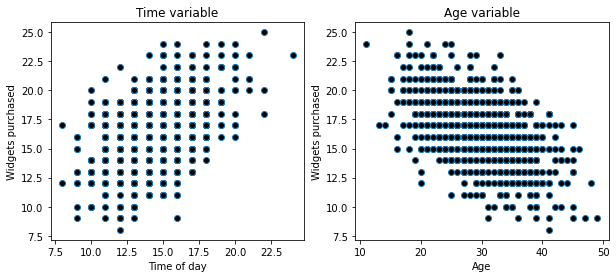

In [21]:
# setup the figure
fig,ax = plt.subplots(1,2,figsize=(10,4))

# plot widgets by time
ax[0].plot(X[:,1],y,'o',markerfacecolor='k')
ax[0].set_title('Time variable')
ax[0].set_xlabel('Time of day')
ax[0].set_ylabel('Widgets purchased')

# plot widgets by age
ax[1].plot(X[:,2],y,'o',markerfacecolor='k')
ax[1].set_title('Age variable')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Widgets purchased')
plt.show()

In [22]:
# predicted data
yHat = X@beta

# r-squared
r2 = 1 - np.sum((yHat-y)**2) / np.sum((y-np.mean(y))**2)
r2

0.38531930617867016